In [1]:
import numpy as np
from scipy.optimize import curve_fit
from lqfn.plotting import Plot
from lqfn.lattice_qcd.metropolis import *

In [2]:
d = 4
N = 8
beta=5.5
beta_improved = 1.719
u0 = 0.797
eps = 0.24
max_r = 3
eps_smearing = 1/12
n_smearing = 4
width_t = 2

In [3]:
N_cf = 5
N_cor = 50
hits = 10
thermalization_its = 2
N_copies = 5
bin_size = 1

In [4]:
def V_fit(x, a, b, c):
    return a*x - b/x + c

In [5]:
def fit(x, y, yerr):
    initial_guess = [1, 1, 1]
    optimal_params, covariance_matrix = curve_fit(V_fit, x, y, p0=initial_guess, sigma=yerr, absolute_sigma=True)

    a_opt, b_opt, c_opt = optimal_params
    param_errors = np.sqrt(np.diag(covariance_matrix))  # Calculate the standard deviation of the fitted parameters
    print(fr"a={a_opt} ± {param_errors[0]}")
    print(fr"b={b_opt} ± {param_errors[1]}")
    print(fr"c={c_opt} ± {param_errors[2]}")
    return a_opt, b_opt, c_opt

In [6]:
def elaborate(data, title):
    params = fit(data[0], data[1], data[2])
    V1 = lambda x: V_fit(x, *params)
    fig = Plot(xlabel='r/a', ylabel='a V(r)', title=title)
    fig.add_errorbar_points(data[0], data[1], data[2], color='blue', label='lattice computation')
    fig.add_plot(0.5, max_r, V1, color='red', label='fit')
    fig.show()

In [7]:
random_matrices = generate_update_matrices_set(200, eps)

0/2 thermalization iteration
1/2 thermalization iteration
0/5
1/5
2/5
3/5
4/5
a=0.2803520628070293 ± 0.08189749395226398
b=0.4380434121710739 ± 0.1751435915008339
c=0.8118441507153961 ± 0.25306854517270727


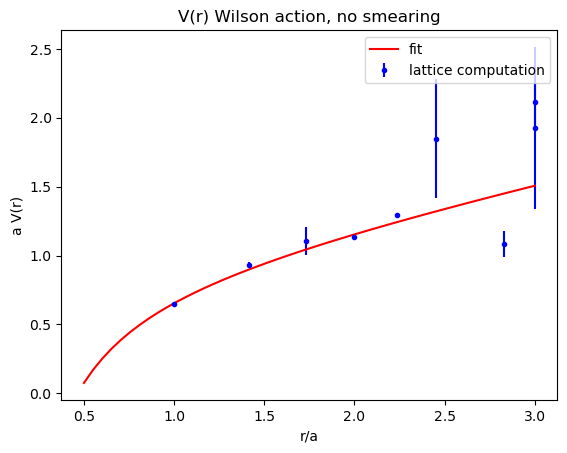

In [10]:
data1 = compute_static_quark_potential(N, d, N_cf, N_cor, hits, thermalization_its, N_copies, bin_size, beta, random_matrices, u0, False, width_t, max_r)
elaborate(data1, title='V(r) Wilson action, no smearing')

c:\Users\damia\Projects\path-integral-monte-carlo\src\lqfn\gauge_qft\lattice_qcd.py:789: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (Array(complex128, 2, 'C', False, aligned=True), Array(complex128, 2, 'A', False, aligned=True))
  smear_links(links, mu, u0, eps_smearing, n_smearing)


0/2 thermalization iteration
1/2 thermalization iteration
0/5
1/5
2/5
3/5
4/5
a=0.515593862907175 ± 0.0499375721286825
b=0.08683311084614194 ± 0.09589236482651564
c=0.21122955344930136 ± 0.1436224435082268


c:\Users\damia\Projects\path-integral-monte-carlo\src\lqfn\plotting.py:71: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  self.fig.show()


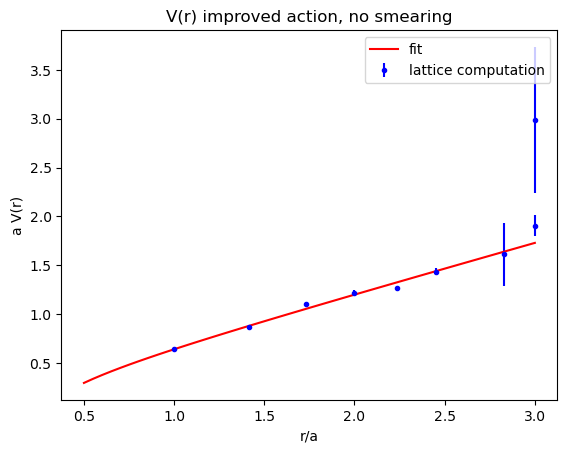

In [8]:
data2 = compute_static_quark_potential(N, d, N_cf, N_cor, hits, thermalization_its, N_copies, bin_size, beta_improved, random_matrices, u0, True, width_t, max_r)
elaborate(data2, title='V(r) improved action, no smearing')

c:\Users\damia\Projects\path-integral-monte-carlo\src\lqfn\gauge_qft\lattice_qcd.py:791: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (Array(complex128, 2, 'C', False, aligned=True), Array(complex128, 2, 'A', False, aligned=True))
  update_lattice(links, hits, beta, random_matrices, u0, improved)


0/5
1/5
2/5
3/5
4/5
a=0.15728610883137803 ± 0.04176762937172314
b=0.6383102054256506 ± 0.08257593735758643
c=1.1090507734724906 ± 0.12349210475549233


c:\Users\damia\Projects\path-integral-monte-carlo\src\lqfn\plotting.py:71: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  self.fig.show()


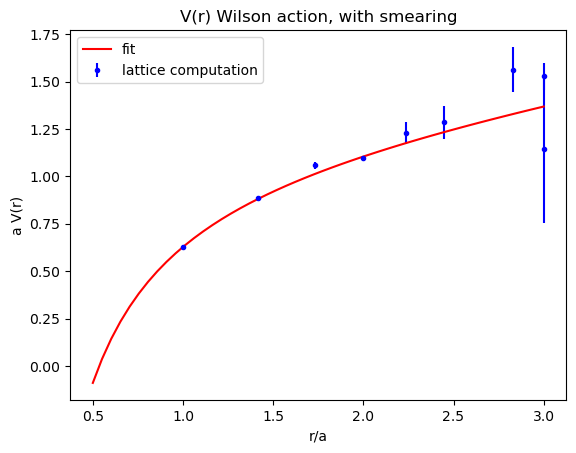

In [8]:
data3 = compute_static_quark_potential(N, d, N_cf, N_cor, hits, thermalization_its, N_copies, bin_size, beta, random_matrices, u0, False, width_t, max_r, eps_smearing, n_smearing)
elaborate(data3, title='V(r) Wilson action, with smearing')

0/5
1/5
2/5
3/5
4/5
a=0.29937446948295 ± 0.058734053715877164
b=0.38751647888750096 ± 0.10080917569931414
c=0.7238601829410771 ± 0.15758152785408788


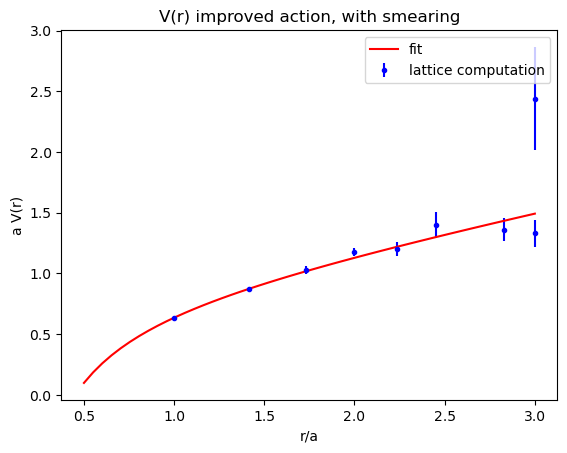

In [9]:
data4 = compute_static_quark_potential(N, d, N_cf, N_cor, hits, thermalization_its, N_copies, bin_size, beta_improved, random_matrices, u0, True, width_t, max_r, eps_smearing, n_smearing)
elaborate(data4, title='V(r) improved action, with smearing')

In [12]:
from lqfn.storage import save
save([data1, data2, data3, data4], 'potentials')